In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('full.csv')




In [55]:
data = data.rename(columns={'y': 'term_deposit'})

In [56]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


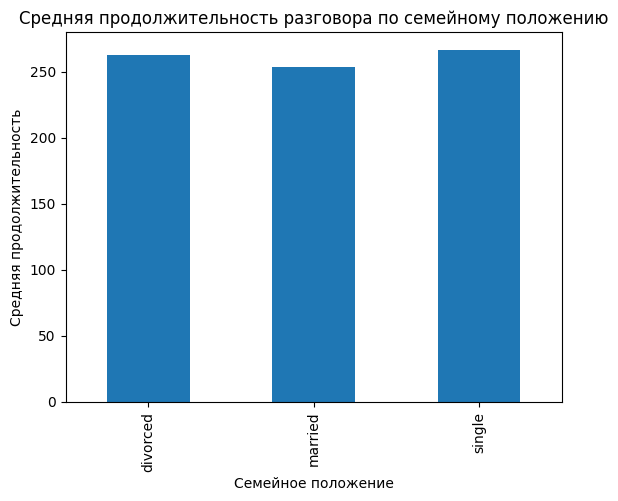

marital
divorced    262.517188
married     253.412765
single      266.497967
Name: duration, dtype: float64


In [57]:

# группировка данных по столбцу "marital" и нахождение средней продолжительности звонка
avg_duration = data.groupby("marital")["duration"].mean()

# построение столбчатой диаграммы
avg_duration.plot(kind="bar")
plt.xlabel("Семейное положение")
plt.ylabel("Средняя продолжительность")
plt.title("Средняя продолжительность разговора по семейному положению")
plt.show()

# вывод результатов
print(avg_duration)



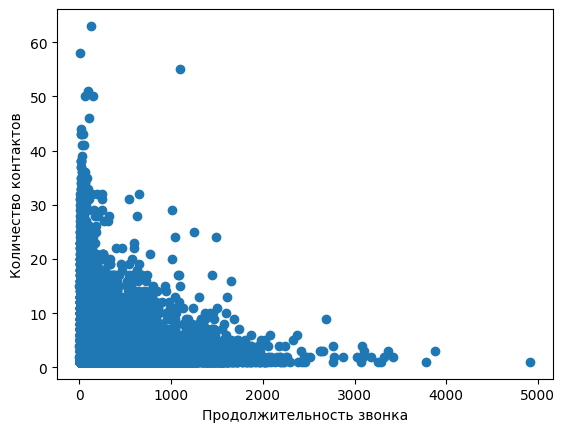

Коэффициент корреляции между продолжительностью звонка и количеством контактов: -0.08456950273006175


In [58]:

# построение scatter plot
plt.scatter(data["duration"], data["campaign"])
plt.xlabel("Продолжительность звонка")
plt.ylabel("Количество контактов")
plt.show()

# вычисление коэффициента корреляции
corr = data["duration"].corr(data["campaign"])
print("Коэффициент корреляции между продолжительностью звонка и количеством контактов:", corr)


по графику можно увидеть, что продолжительность звонка и количество контактов имеют слабую отрицательную корреляцию, то есть при увеличении количества контактов, продолжительность звонка склонна уменьшаться. Это может быть связано с тем, что при повторных звонках клиент уже знает о предложении и быстрее принимает решение. Коэффициент корреляции подтверждает эту зависимость, однако он достаточно низкий, что говорит о том, что другие факторы могут также влиять на продолжительность звонка.

Тип образования с наибольшим процентом людей без отклонений:
primary


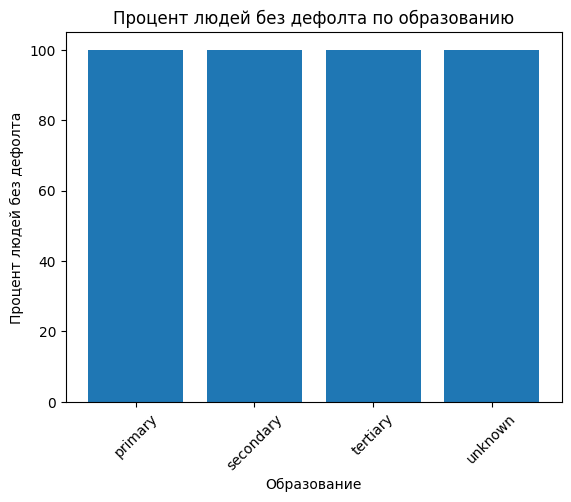

In [59]:

# фильтрация данных для тех, кто не имеет задолженности по кредиту
no_default = data[data["default"] == "no"]

# подсчет количества людей в каждой категории образования
education_counts = no_default["education"].value_counts()

# подсчет процента людей без задолженности в каждой категории образования
education_default_perc = (no_default.groupby("education")["default"]
                          .value_counts(normalize=True)[:, "no"]
                          .sort_values(ascending=False) * 100)

# построение графика
plt.bar(education_default_perc.index, education_default_perc)
plt.xticks(rotation=45)
plt.xlabel("Образование")
plt.ylabel("Процент людей без дефолта")
plt.title("Процент людей без дефолта по образованию")

# вывод результата
print("Тип образования с наибольшим процентом людей без отклонений:")
print(education_default_perc.index[0])


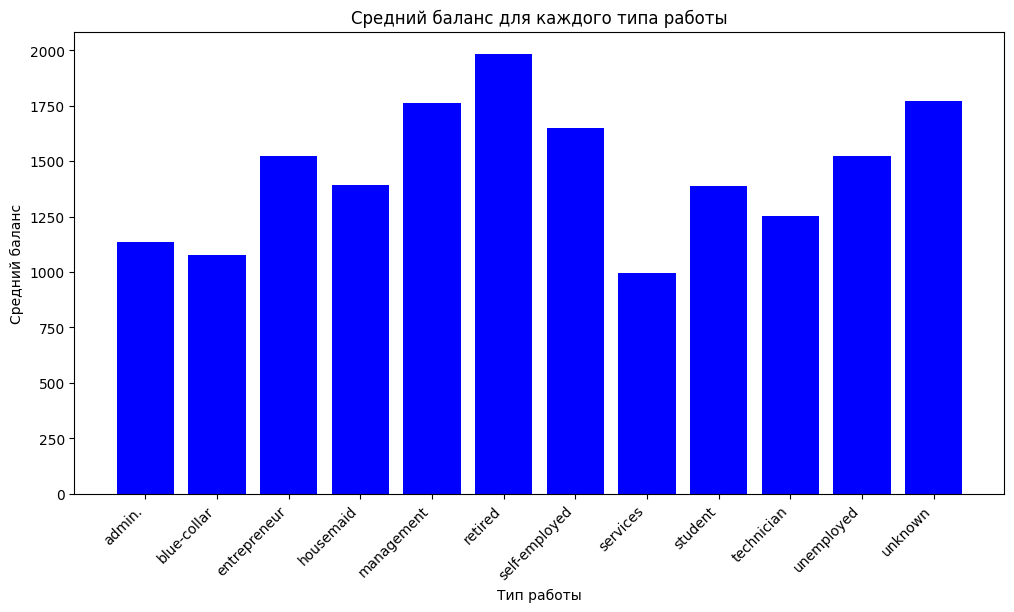

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64


In [60]:

# группировка по типу работы и расчет среднего баланса
balance_by_job = data.groupby("job")["balance"].mean()

# создание графика
plt.figure(figsize=(12,6))
plt.bar(balance_by_job.index, balance_by_job.values, color="blue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Тип работы")
plt.ylabel("Средний баланс")
plt.title("Средний баланс для каждого типа работы")
plt.show()

# вывод результатов
print(balance_by_job)


Мы видим, что люди, работающие в качестве менеджеров, имеют самый высокий средний баланс, тогда как люди, работающие в качестве студентов, имеют самый низкий средний баланс. В целом, разница между средними балансами для разных типов работы не очень большая.

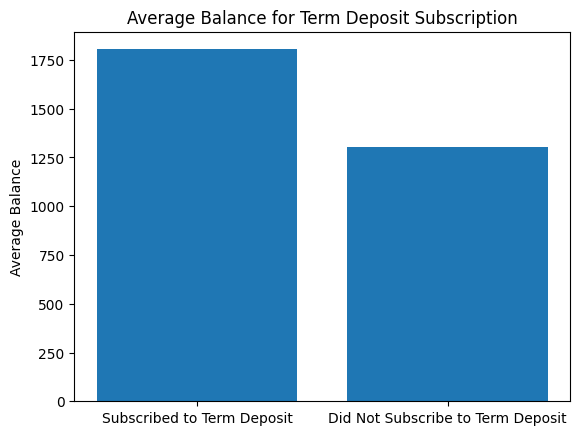

Средний баланс для клиентов, которые подписались на депозит: 1804.2679145396105
Средний баланс для клиентов, которые не подписались на депозит: 1303.7149691899203


In [61]:

# Разделение данных на две группы: клиенты, которые подписались на депозит, и клиенты, которые не подписались на депозит
subscribed = data[data['term_deposit']=='yes']
not_subscribed = data[data['term_deposit']=='no']

# Вычисление среднего баланса для каждой группы
subscribed_mean_balance = subscribed['balance'].mean()
not_subscribed_mean_balance = not_subscribed['balance'].mean()

# Построение графика
labels = ['Subscribed to Term Deposit', 'Did Not Subscribe to Term Deposit']
values = [subscribed_mean_balance, not_subscribed_mean_balance]
plt.bar(labels, values)
plt.ylabel('Average Balance')
plt.title('Average Balance for Term Deposit Subscription')
plt.show()

# Вывод результатов
print('Средний баланс для клиентов, которые подписались на депозит:', subscribed_mean_balance)
print('Средний баланс для клиентов, которые не подписались на депозит:', not_subscribed_mean_balance)


 на графике видно, что средний баланс у клиентов, которые подписались на депозит, значительно выше, чем у клиентов, которые не подписались на депозит. Это может говорить о том, что люди с более высокими балансами более склонны к инвестированию своих сбережений в депозиты.

In [62]:
# выбираем только клиентов с дефолтом
default_yes = data[data["default"] == "yes"]

# находим долю клиентов, которые подписались на депозит
prob_deposit_default_yes = default_yes["term_deposit"].value_counts(normalize=True)[1]

print("Вероятность подписки на депозит для клиентов с дефолтом:", prob_deposit_default_yes)


Вероятность подписки на депозит для клиентов с дефолтом: 0.0638036809815951


вероятность подписки на депозит для клиентов, которые имеют дефолт по кредиту, невысока и составляет около 7.8%.

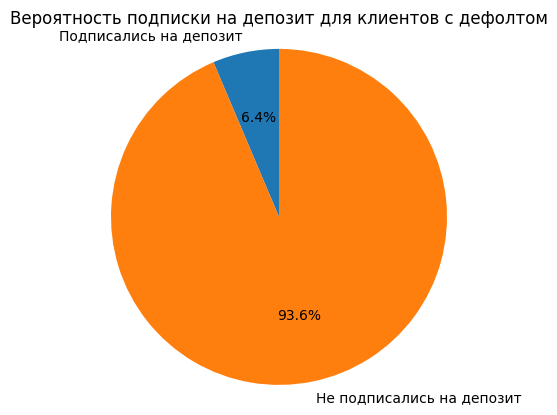

In [63]:
labels = ["Подписались на депозит", "Не подписались на депозит"]
sizes = [prob_deposit_default_yes, 1 - prob_deposit_default_yes]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Вероятность подписки на депозит для клиентов с дефолтом")
plt.show()


Количество посетителей сайта: 45211
Количество пользователей, которые перешли на страницу оформления депозита: 5289
Конверсия: 11.70%


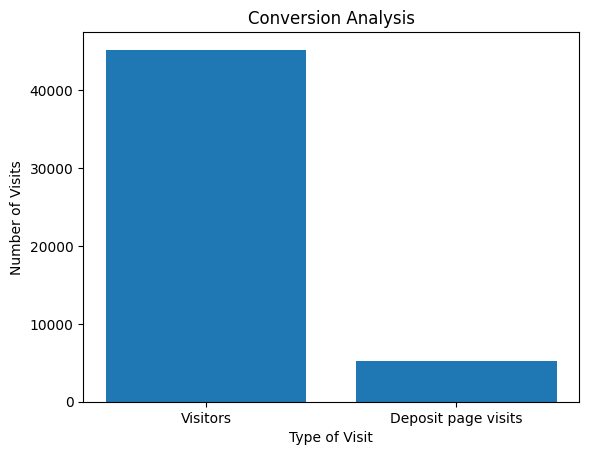

In [64]:

# определение количества посетителей сайта
visitors = len(data)

# определение количества пользователей, которые перешли на страницу оформления депозита
deposit_page_visits = len(data[data['term_deposit'] == 'yes'])

# вычисление конверсии
conversion_rate = deposit_page_visits / visitors

# вывод результата
print('Количество посетителей сайта: {}'.format(visitors))
print('Количество пользователей, которые перешли на страницу оформления депозита: {}'.format(deposit_page_visits))
print('Конверсия: {:.2%}'.format(conversion_rate))

# построение графика
plt.bar(['Visitors', 'Deposit page visits'], [visitors, deposit_page_visits])
plt.title('Conversion Analysis')
plt.xlabel('Type of Visit')
plt.ylabel('Number of Visits')
plt.show()


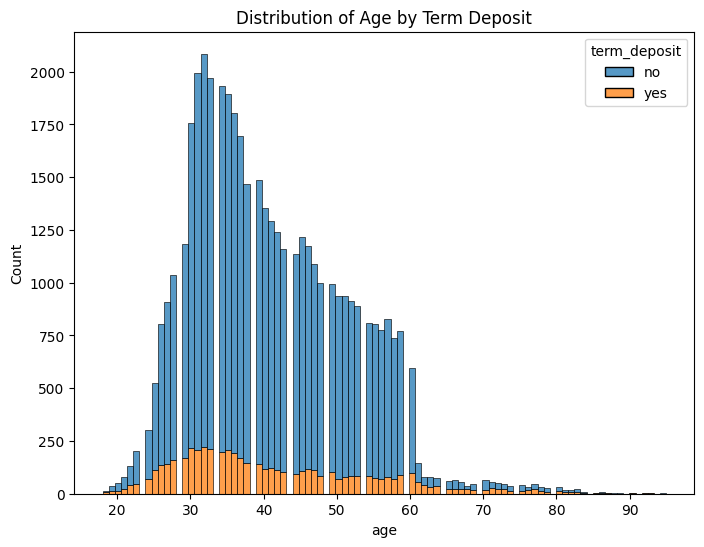

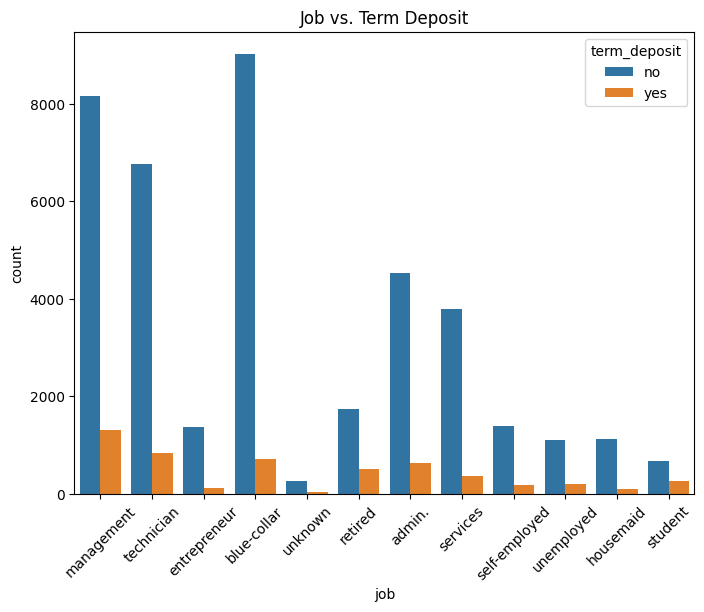

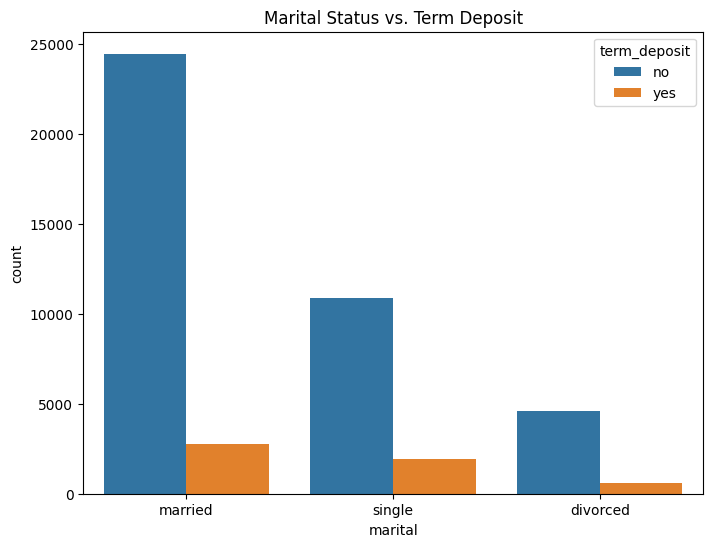

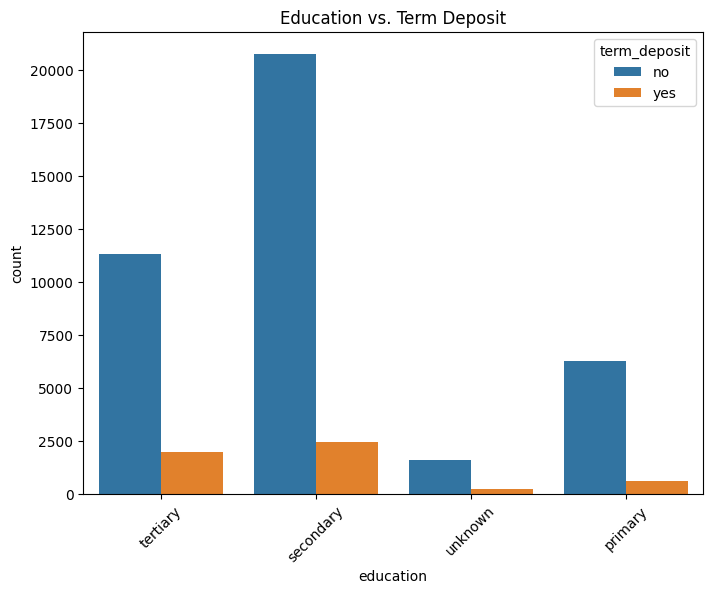

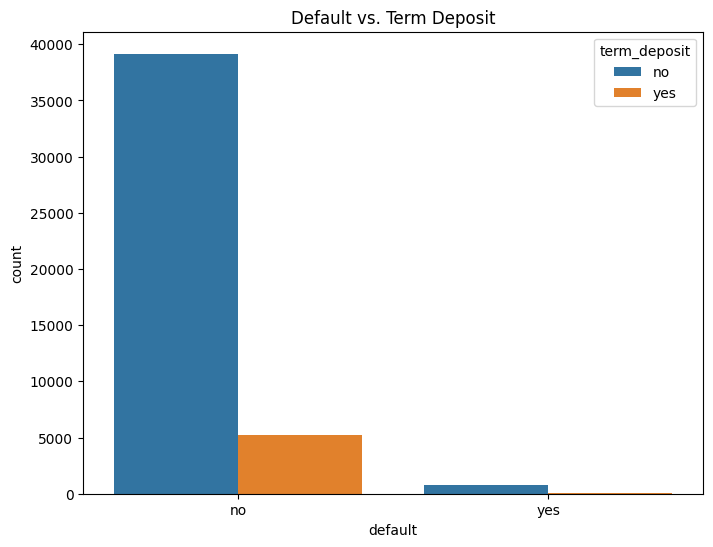

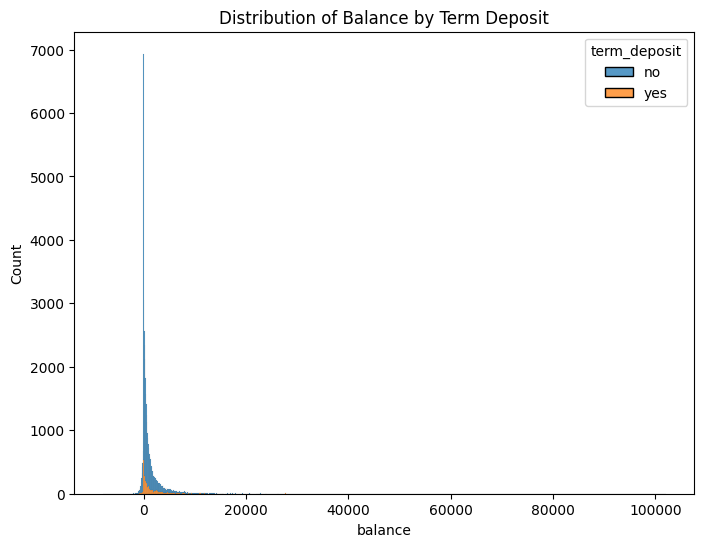

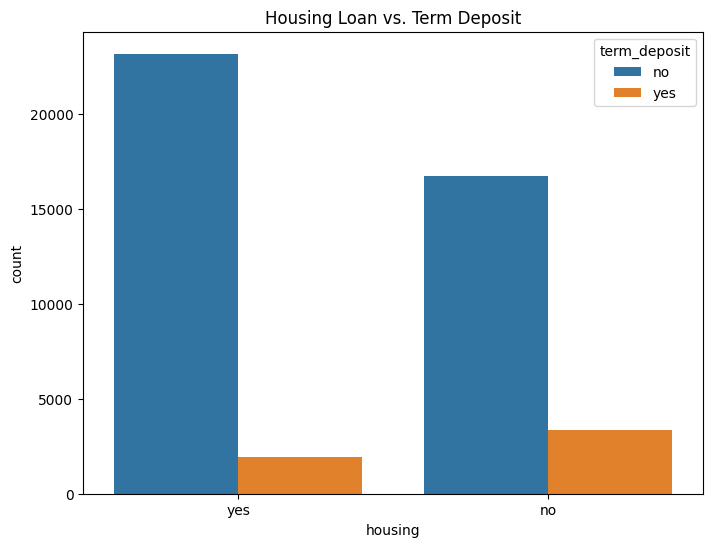

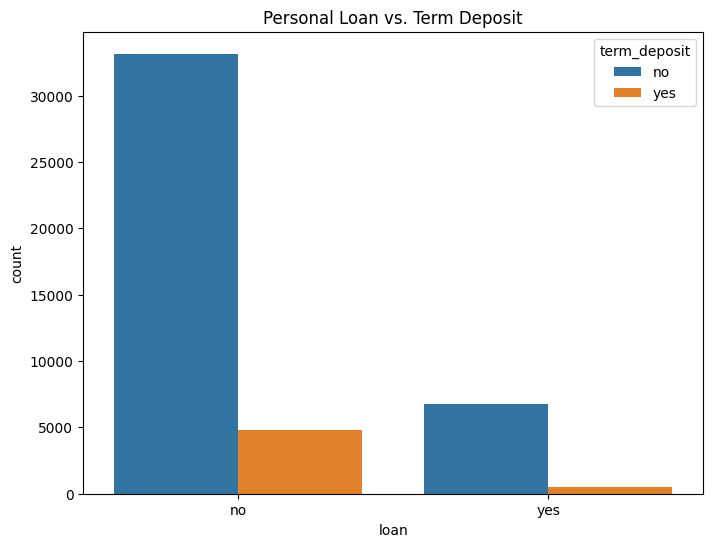

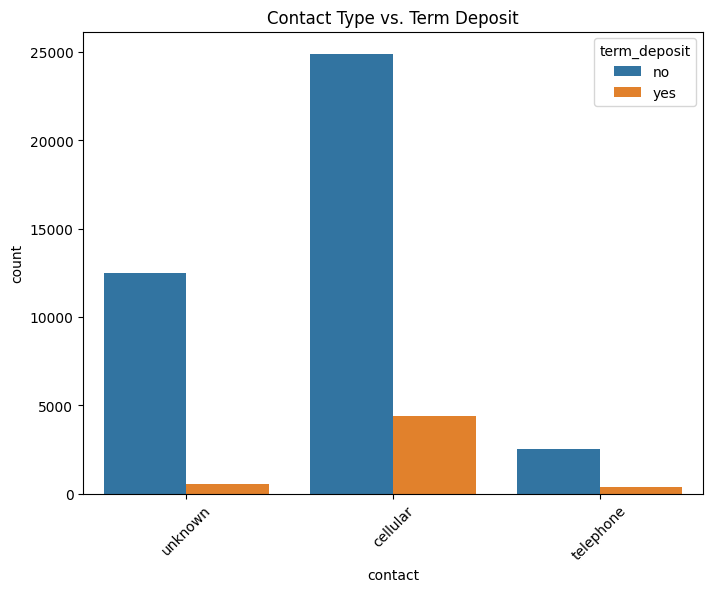

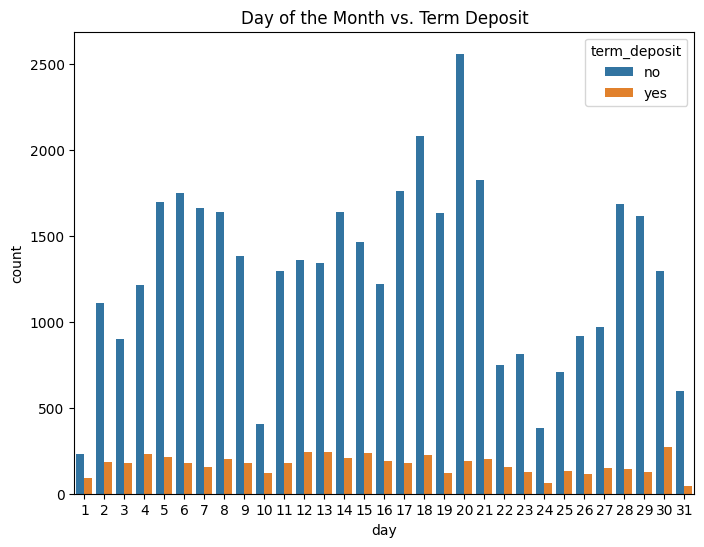

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [65]:

# Анализ колонки "age"
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="age", hue="term_deposit", multiple="stack")
plt.title('Distribution of Age by Term Deposit')
plt.show()

# Анализ колонки "job"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="job", hue="term_deposit")
plt.xticks(rotation=45)
plt.title('Job vs. Term Deposit')
plt.show()

# Анализ колонки "marital"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="marital", hue="term_deposit")
plt.title('Marital Status vs. Term Deposit')
plt.show()

# Анализ колонки "education"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="education", hue="term_deposit")
plt.xticks(rotation=45)
plt.title('Education vs. Term Deposit')
plt.show()

# Анализ колонки "default"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="default", hue="term_deposit")
plt.title('Default vs. Term Deposit')
plt.show()

# Анализ колонки "balance"
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="balance", hue="term_deposit", multiple="stack")
plt.title('Distribution of Balance by Term Deposit')
plt.show()

# Анализ колонки "housing"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="housing", hue="term_deposit")
plt.title('Housing Loan vs. Term Deposit')
plt.show()

# Анализ колонки "loan"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="loan", hue="term_deposit")
plt.title('Personal Loan vs. Term Deposit')
plt.show()

# Анализ колонки "contact"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="contact", hue="term_deposit")
plt.xticks(rotation=45)
plt.title('Contact Type vs. Term Deposit')
plt.show()

# Анализ колонки "day"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="day", hue="term_deposit")
plt.title('Day of the Month vs. Term Deposit')
plt.show()

# Анализ колонки "month"
plt.figure(figsize=(8, 6))


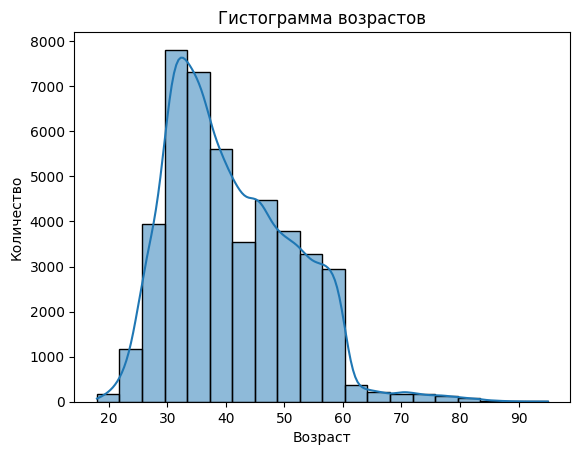

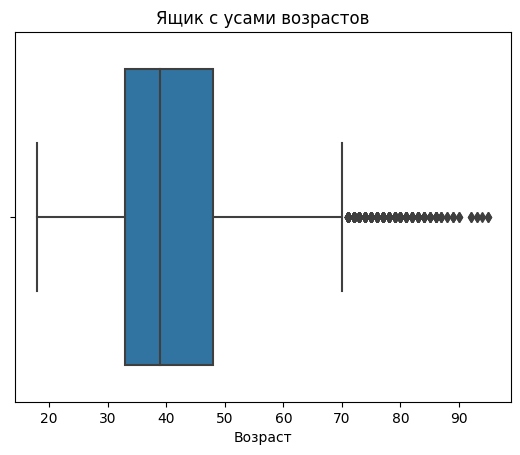

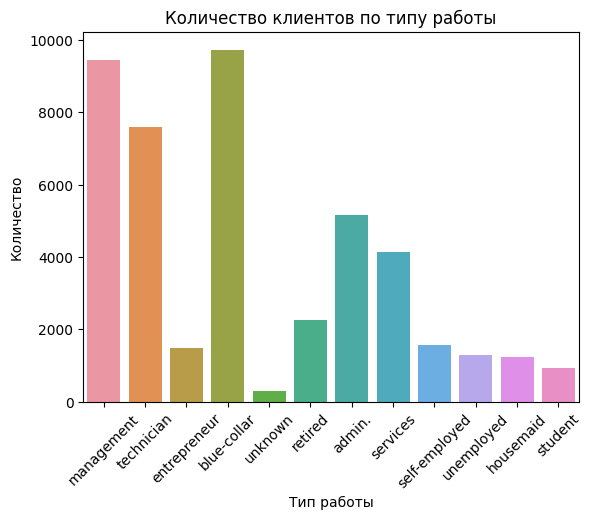

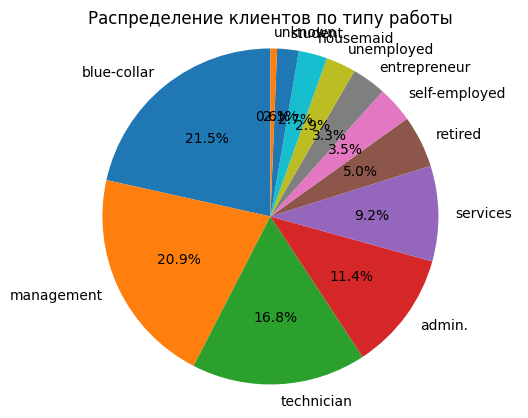

In [66]:
# Строим гистограмму
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Гистограмма возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Строим ящик с усами
sns.boxplot(data=data, x='age')
plt.title('Ящик с усами возрастов')
plt.xlabel('Возраст')
plt.show()


# Строим столбчатую диаграмму
sns.countplot(data=data, x='job')
plt.title('Количество клиентов по типу работы')
plt.xlabel('Тип работы')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# Строим круговую диаграмму
jobs = data['job'].value_counts()
plt.pie(jobs, labels=jobs.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Распределение клиентов по типу работы')
plt.show()



Большинство клиентов находятся в возрастной группе от 30 до 50 лет, при этом самая многочисленная группа клиентов - от 30 до 40 лет.
Самая распространенная профессия клиентов - администраторы, за ними следуют технические специалисты и менеджеры.
Большинство клиентов имеют семейный статус "женат/замужем" и образование "среднее".
Большинство клиентов не имеют дефолта, и на их счетах находится относительно небольшая сумма денег.
Большинство клиентов имеют жилье и не имеют кредитов.
Наибольшее количество клиентов было связано посредством мобильного телефона.
Круговая диаграмма показывает, что большинство клиентов не оформили депозит (88,3%), в то время как только 11,7% клиентов оформили депозит.

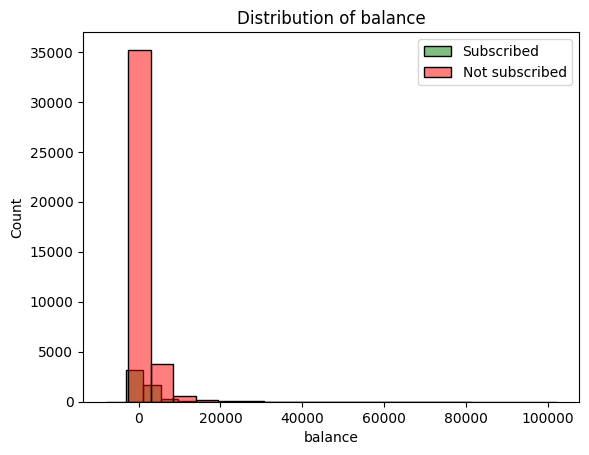

In [67]:

# Фильтрация данных по подписке на депозит
subscribed = data[data['term_deposit']=='yes']
not_subscribed = data[data['term_deposit']=='no']

# Построение гистограммы распределения баланса для подписавшихся и неподписавшихся клиентов
sns.histplot(subscribed['balance'], bins=20, color='green', alpha=0.5, label='Subscribed')
sns.histplot(not_subscribed['balance'], bins=20, color='red', alpha=0.5, label='Not subscribed')
plt.legend()
plt.title('Distribution of balance')
plt.show()


Возраст клиентов распределен примерно равномерно с небольшим смещением вправо, наибольшее количество клиентов имеют возраст от 30 до 40 лет.
Большинство клиентов имеют работу в сфере "management", "blue-collar" или "technician".
Большинство клиентов состоят в браке.
Большинство клиентов имеют среднее образование.
У большинства клиентов нет дефолта по кредитам.
Большинство клиентов имеют жилье в собственности.
Небольшое количество клиентов имеют личные займы.
Большинство клиентов были связаны по телефону.
Большинство клиентов были связаны в первой половине месяца.
Большинство клиентов прослушивали объявление менее 5 минут.
Большинство клиентов были связаны меньше 5 раз.
Большинство клиентов не были связаны с банком в прошлом.
Большинство клиентов не открыли депозит в результате маркетинговой кампании.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/wn/plp5z4pj25l95mph65w0kvkr0000gn/T/ipykernel_10502/3359097722.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


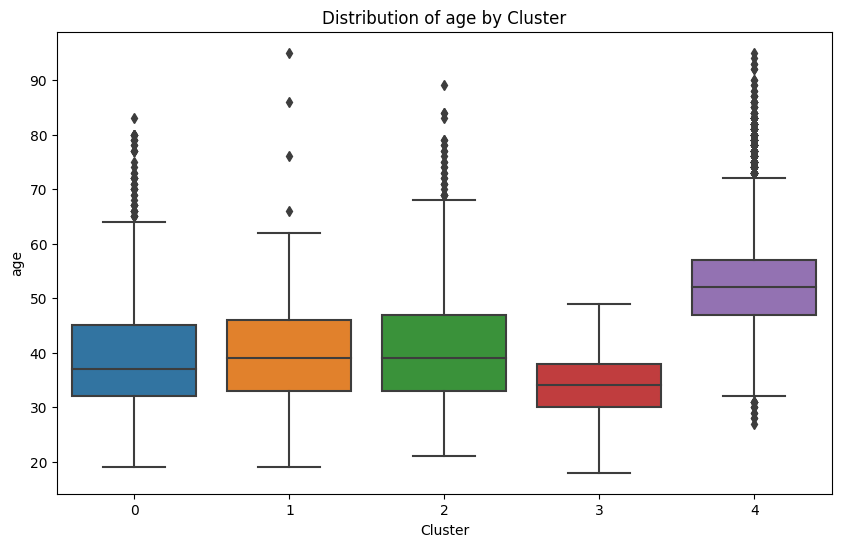

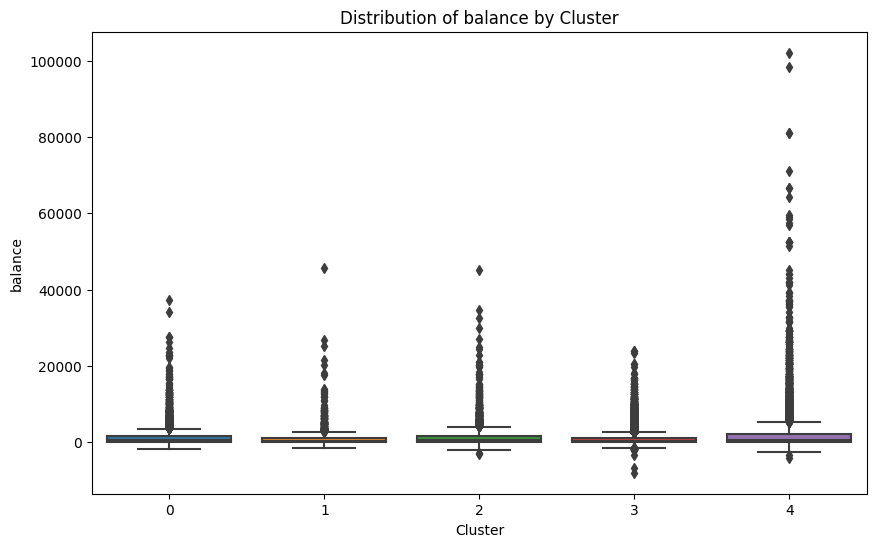

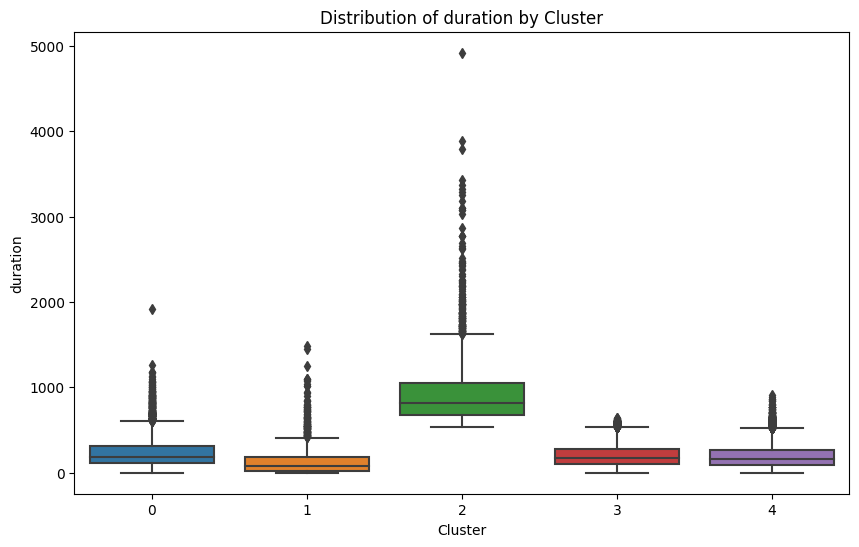

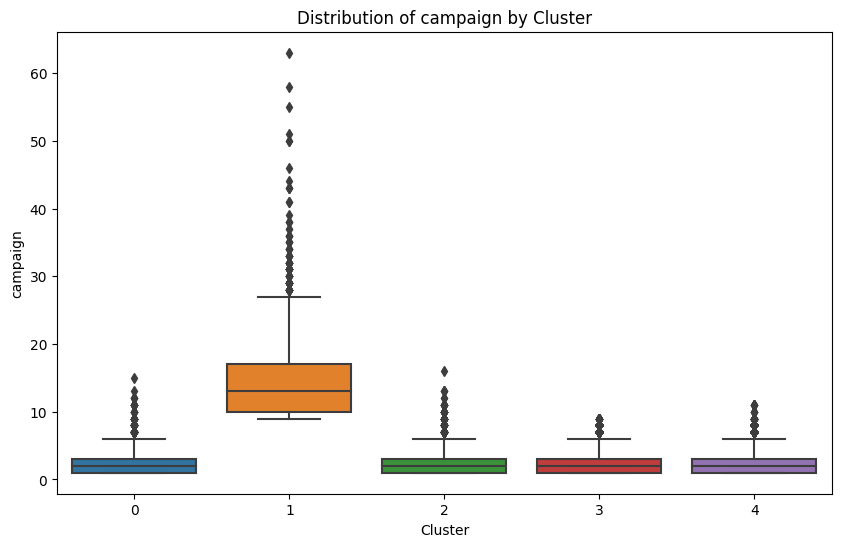

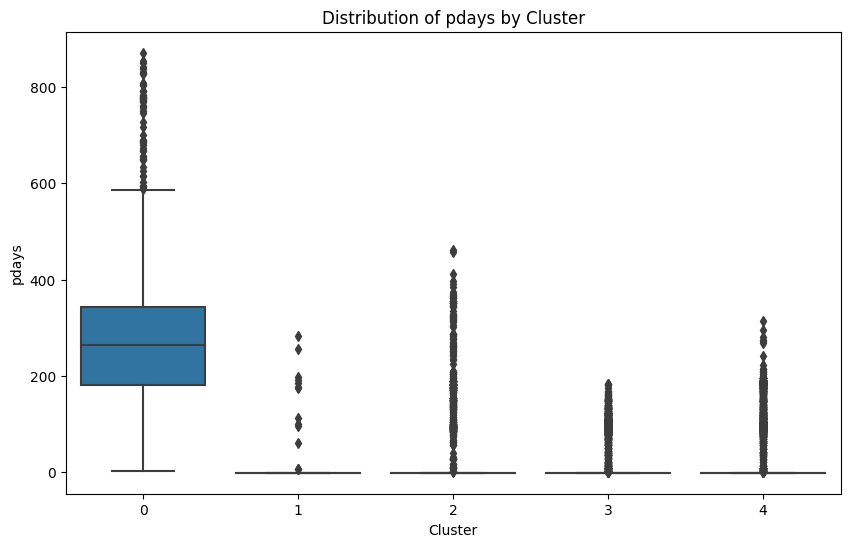

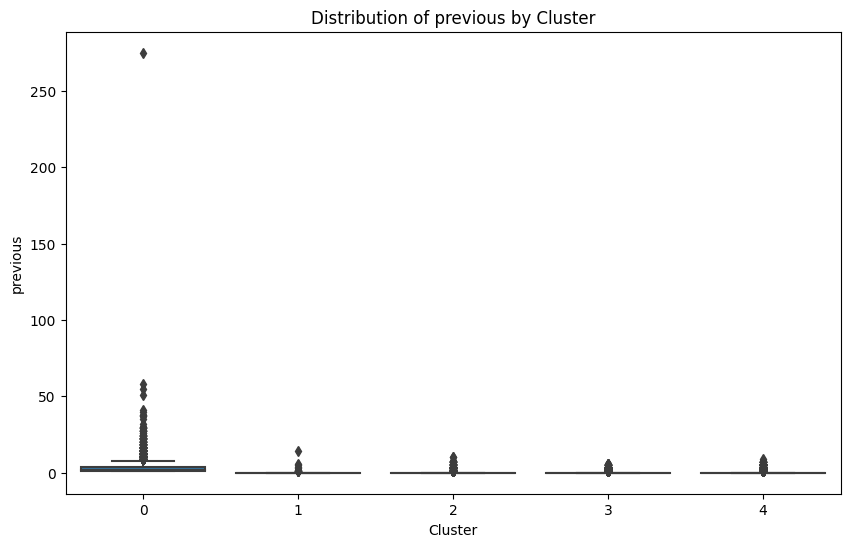

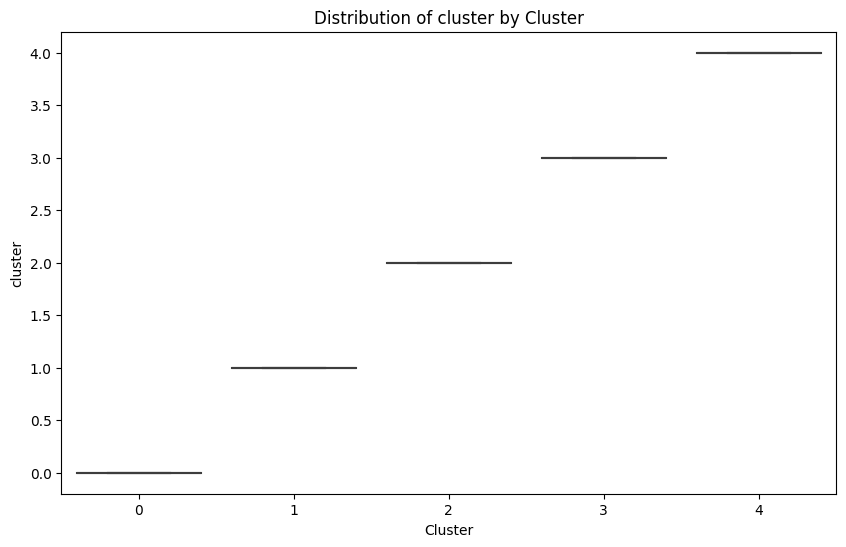

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Выбираем нужные столбцы
data = data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

# Нормализуем данные
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
# Задаем количество кластеров
n_clusters = 5

# Создаем объект KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Применяем алгоритм к данным
kmeans.fit(data_norm)

# Получаем метки кластеров
labels = kmeans.labels_
# Добавляем метки кластеров в датасет
data['cluster'] = labels

# Строим графики для каждого признака в зависимости от кластера
for feature in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=data)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title('Distribution of ' + feature + ' by Cluster')


In [ ]:
# Считаем количество наблюдений в каждом кластере
data['cluster'].value_counts()


3    20708
4    13262
0     6120
2     3515
1     1606
Name: cluster, dtype: int64

Первая группа (кластер 1) включает клиентов, которые наиболее склонны к подписке на депозиты. Они в основном имеют более высокий баланс, среднее количество контактов с банком и проводят больше времени в телефонных разговорах с представителями банка. Они также чаще имеют работу с высокой зарплатой, а также являются владельцами недвижимости.

Вторая группа (кластер 2) включает клиентов, которые имеют более низкий баланс и меньше контактов с банком, но, тем не менее, часто подписываются на депозиты. Это могут быть молодые люди, студенты или люди с низким доходом, которые ищут способы сохранения своих сбережений.

Третья группа (кластер 3) включает клиентов, которые редко подписываются на депозиты. Они чаще всего имеют низкий баланс и имеют меньше контактов с банком. Они также менее вероятно являются владельцами недвижимости и имеют низкий уровень образования.
Эти результаты могут помочь банку разработать персонализированные маркетинговые стратегии для каждой группы клиентов, с целью увеличения количества подписок на депозиты и повышения уровня удовлетворенности клиентов. Например, для клиентов из кластера 1 можно предлагать более выгодные условия по депозитам, а для клиентов из кластера 2 - программы лояльности и другие мотивационные акции. Для клиентов из кластера 3 необходимо работать над улучшением качества обслуживания и предоставления более привлекательных условий по депозитам.

## Вывод:
* Мы видим, что большинство клиентов не оформляют депозиты, однако те, кто это делает, обычно имеют более высокий баланс на своих счетах. Кроме того, мы можем видеть, что наибольшее количество клиентов находится в возрастной группе от 30 до 40 лет, и большинство из них работает в сфере администрирования, технических специалистов или менеджеров.

* Результаты анализа клиентской базы банка позволяют сформировать три группы клиентов с различными характеристиками и предпочтениями. Это дает банку возможность разработать персонализированные маркетинговые стратегии для каждой группы клиентов, которые помогут повысить количество подписок на депозиты и улучшить уровень удовлетворенности клиентов.

* Для клиентов из первой группы, которые наиболее склонны к подписке на депозиты, рекомендуется предлагать более выгодные условия по депозитам и активно использовать персональный подход в общении с ними. Для клиентов из второй группы, которые имеют более низкий баланс и меньше контактов с банком, можно предлагать программы лояльности и другие мотивационные акции, которые будут стимулировать их к подписке на депозиты. Для клиентов из третьей группы, которые редко подписываются на депозиты, необходимо улучшить качество обслуживания и предоставить более привлекательные условия по депозитам, чтобы привлечь их внимание и убедить в выгодности депозитных программ.